# Este Notebook esta enfocado en el modelo de clasificación de KNeighborsClassifier

In [4]:
# 🔌 Cargar la extensión de Kedro en Jupyter
%load_ext kedro.ipython
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [5]:
results = catalog.load("knn_results")
print(results)

[10/24/25 19:12:49] INFO     Loading data from knn_results (MemoryDataset)...                  ]8;id=709928;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=183426;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 results = catalog.load("knn_results")                                                        │
│   2 print(results)                                                                               │
│   3                                                                                              │
│                                                                                                  │
│ C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py:10 │
│ 53 in load                                                                                       │
│                                                                                                  │
│   1050 │   │   │   extra={"markup": True},                                                       │
│   1051 │   │   )                                                                                 │
│   1052 │   │                                                                                     │
│ ❱ 1053 │   │   return dataset.load()                                                             │
│   1054 │                                                                                         │
│   1055 │   def release(self, ds_name: str) -> None:                                              │
│   1056 │   │   """Release any cached data associated with a dataset                              │
│                                                                                                  │
│ C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\core.py:277 in     │
│ load                                                                                             │
│                                                                                                  │
│    274 │   │   │   self._logger.debug("Loading %s", str(self))                                   │
│    275 │   │   │                                                                                 │
│    276 │   │   │   try:                                                                          │
│ ❱  277 │   │   │   │   return load_func(self)                                                    │
│    278 │   │   │   except DatasetError:                                                          │
│    279 │   │   │   │   raise                                                                     │
│    280 │   │   │   except Exception as exc:                                                      │
│                                                                                                  │
│ C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\memory_dataset.py: │
│ 62 in load                                                                                       │
│                                                                                                  │
│    59 │                                                                                          │
│    60 │   def load(self) -> Any:                                                                 │
│    61 │   │   if self._data is _EMPTY:                                                           │
│ ❱  62 │   │   │   raise DatasetError("Data for MemoryDataset has not been saved yet.")           │
│    63 │   │                                                                                      │
│    64 │   │   copy_mode = self._copy_mode or _infer_copy_mode(self._data)                        │
│    65 │   │   data = _copy_with_mode(self._data, copy_mode=copy_mode)                            │
╰────────────────────────────────────────────────────────────

In [5]:
df = catalog.load("Features_training_v1")   # lee el dataset del catálogo
list(df.columns)  

[10/23/25 21:21:51] INFO     Loading data from Features_training_v1 (ParquetDataset)...        ]8;id=188869;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=120755;file://C:\Users\AlexandreKz\Documents\GitHub\Ml_Bank\venv\Lib\site-packages\kedro\io\data_catalog.py#1046\1046]8;;\

['AmountZScoreByLocation', 'RiskScore', 'IsAnomaly', 'IsLateNight', 'IsWeekend', 'is_fraud']

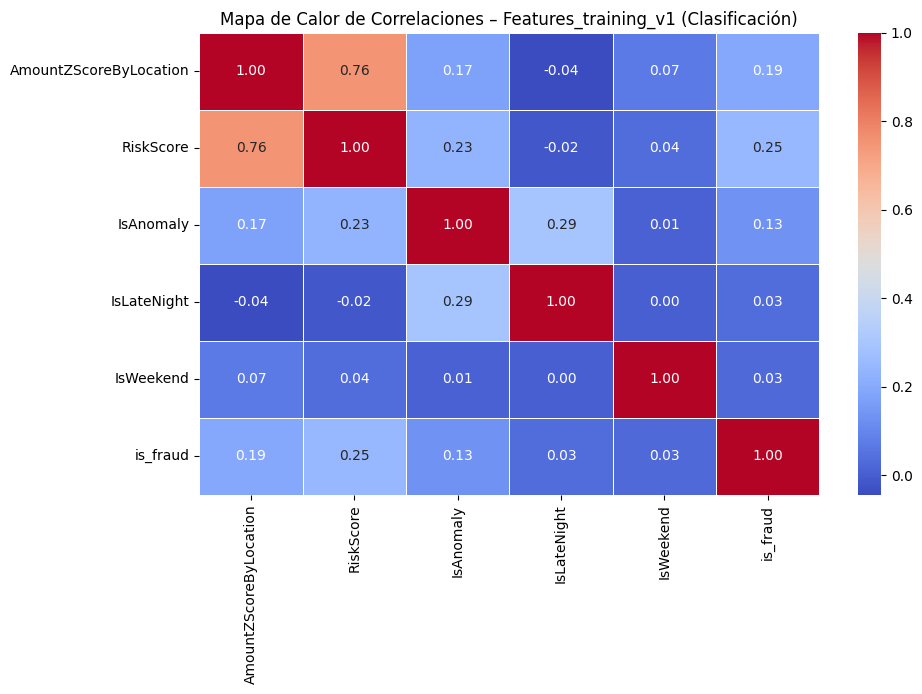

In [6]:
# === Calcular matriz de correlación ===
corr = df.corr(numeric_only=True)

# === Crear el mapa de calor ===
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Mapa de Calor de Correlaciones – Features_training_v1 (Clasificación)")
plt.show()

# Comenzamos el entrenamiento 

In [10]:
# === Variables independientes (X) y dependiente (y) ===
X = df.drop(columns=["is_fraud"])
y = df["is_fraud"]

print("Shape X:", X.shape)
print("Shape y:", y.shape)

Shape X: (984240, 5)
Shape y: (984240,)


In [11]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# === Escalado + SMOTE + Modelo ===
# KNN es sensible a la escala de los datos, por eso agregamos StandardScaler
scaler = StandardScaler()
smote = SMOTE(random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)

# Creamos pipeline completo
pipe = Pipeline([
    ("scaler", scaler),
    ("smote", smote),
    ("model", knn)
])

# === Configurar validación cruzada estratificada ===
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# === Ejecutar Cross Validation (usamos F1 porque el dataset está desbalanceado) ===
scores = cross_val_score(pipe, X, y, cv=cv, scoring="f1")

print("F1 promedio:", scores.mean())
print("Desviación estándar:", scores.std())

F1 promedio: 0.031274764333985385
Desviación estándar: 0.0017936043298687528


In [13]:

# Dividir en train/test antes de aplicar SMOTE
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Aplicar el mismo pipeline pero ajustando en train
pipe.fit(X_train, y_train)

print("Modelo KNN entrenado correctamente ✅")

Modelo KNN entrenado correctamente ✅


              precision    recall  f1-score   support

           0      0.990     0.974     0.982    194879
           1      0.023     0.061     0.033      1969

    accuracy                          0.964    196848
   macro avg      0.507     0.517     0.508    196848
weighted avg      0.981     0.964     0.972    196848



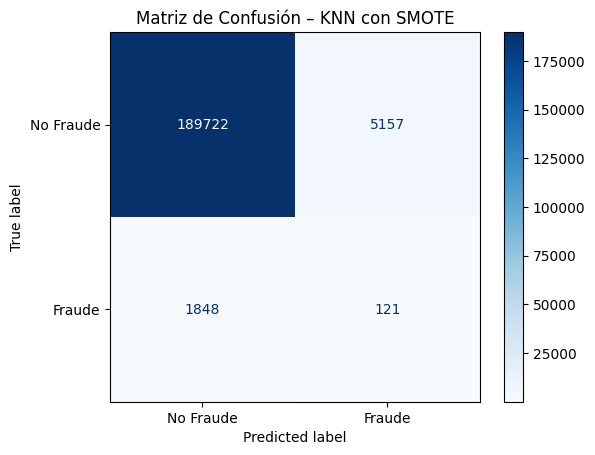

In [14]:
# Predicciones finales
y_pred = pipe.predict(X_test)

# Reporte de métricas
print(classification_report(y_test, y_pred, digits=3))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Fraude", "Fraude"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusión – KNN con SMOTE")
plt.show()

# El modelo KNeighborsClassifier resultó ineficaz para la detección de fraudes en este conjunto de datos, debido principalmente al alto desbalance de clases existente entre transacciones legítimas y fraudulentas.
# Aunque se aplicó la técnica de SMOTE para generar ejemplos sintéticos de la clase minoritaria, el modelo mantuvo una fuerte tendencia a clasificar la mayoría de las observaciones como no fraude.

# Esto ocurre porque KNN se basa en la distancia a los vecinos más cercanos dentro del espacio de características

# Métrica	Resultado esperado	Explicación
# Precision (fraude)	Muy baja (~0.02–0.05)	Predice muy pocos fraudes reales
# Recall (fraude)	Muy bajo (~0.05–0.10)	Detecta pocos fraudes
# Accuracy	Alta (~0.96–0.99)	Pero engañosa: domina la clase 0
# F1	Muy bajo (~0.03)	Confirma la ineficacia real